## Objective

Explore the data

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
import numpy as np # weird issue with numpy as they are changing supported data types (10.2.24) # consider !pip install "numpy<1.24"
import pandas as pd
import seaborn as sns

os.chdir("..//..//") # from root
sys.path.insert(0, os.path.abspath("src/"))
from clean_data import clean_news


print(sys.version)
print(np.__version__, pd.__version__) # important versions 
plt.rcParams["figure.figsize"] = (10, 8)

# be able to view text
pd.set_option('display.max_colwidth', None)

3.11.8 (v3.11.8:db85d51d3e, Feb  6 2024, 18:02:37) [Clang 13.0.0 (clang-1300.0.29.30)]
1.23.5 2.2.3


In [2]:
def profile_data(df:pd.DataFrame) -> None:
    print(f"data shape - {df.shape}")
    print(f"\n\ndate nulls - {df.isnull().sum()}\n")    
    date = pd.to_datetime(df["Date"])
    print(f"Min date {date.min()} - Max date {date.max()}")


## Data

In [3]:
!tree data/raw/stock_reddit_data/ 

data/raw/stock_reddit_data/
├── Combined_News_DJIA.csv
├── RedditNews.csv
└── upload_DJIA_table.csv

1 directory, 3 files


In [4]:
df_combined = pd.read_csv("data/raw/stock_reddit_data/Combined_News_DJIA.csv")

print(df_combined.shape)
df_combined.head(1)


(1989, 27)


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as countries move to brink of war""",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)',"b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire'","b""Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing""",b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.',"b""Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side""","b""The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it.""",...,"b'Georgia Invades South Ossetia - if Russia gets involved, will NATO absorb Georgia and unleash a full scale war?'",b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to prevent an Israeli strike on Iran."" Israeli Defense Minister Ehud Barak: ""Israel is prepared for uncompromising victory in the case of military hostilities.""'",b'This is a busy day: The European Union has approved new sanctions against Iran in protest at its nuclear programme.',"b""Georgia will withdraw 1,000 soldiers from Iraq to help fight off Russian forces in Georgia's breakaway region of South Ossetia""",b'Why the Pentagon Thinks Attacking Iran is a Bad Idea - US News &amp; World Report',b'Caucasus in crisis: Georgia invades South Ossetia',"b'Indian shoe manufactory - And again in a series of ""you do not like your work?""'",b'Visitors Suffering from Mental Illnesses Banned from Olympics',"b""No Help for Mexico's Kidnapping Surge"""


In [5]:
df_combined = df_combined.melt(id_vars=["Date", "Label"], value_name = "News",var_name="Daily_Article_Rank")
df_combined = clean_news(df_combined)
df_combined = df_combined.rename(columns={"Label": "DIJA_rose_or_same"})


profile_data(df_combined)
df_combined.head(3)

of (49725, 4), byte prefixes 11921 - filled in nans 7
data shape - (49725, 4)


date nulls - Date                  0
DIJA_rose_or_same     0
Daily_Article_Rank    0
News                  0
dtype: int64

Min date 2008-08-08 00:00:00 - Max date 2016-07-01 00:00:00


,Date,DIJA_rose_or_same,Daily_Article_Rank,News
0,2008-08-08,0,Top1,
1,2008-08-11,1,Top1,
2,2008-08-12,0,Top1,


In [6]:
df_reddit = pd.read_csv("data/raw/stock_reddit_data/RedditNews.csv")
df_reddit = clean_news(df_reddit)

print(df_reddit.shape)
df_reddit.head(2).T


of (73608, 2), byte prefixes 18811 - filled in nans 0
(73608, 2)


,0,1
Date,2016-07-01,2016-07-01
News,"A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.",IMF chief backs Athens as permanent Olympic host


In [7]:
df_DIJA = pd.read_csv("data/raw/stock_reddit_data/upload_DJIA_table.csv")
profile_data(df_DIJA)

df_DIJA.head(2).T


data shape - (1989, 7)


date nulls - Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

Min date 2008-08-08 00:00:00 - Max date 2016-07-01 00:00:00


,0,1
Date,2016-07-01,2016-06-30
Open,17924.240234,17712.759766
High,18002.380859,17930.609375
Low,17916.910156,17711.800781
Close,17949.369141,17929.990234
Volume,82160000,133030000
Adj Close,17949.369141,17929.990234


### Data Validation

In [8]:
# Check the distribution of weekdays
# more Monday holidays  - ex floating monday holidays like MLK day
pd.to_datetime(df_DIJA["Date"]).dt.day_name().value_counts(dropna=False)

Date
Wednesday    409
Tuesday      409
Thursday     399
Friday       397
Monday       375
Name: count, dtype: int64

### Are the News Articles Unique?

In [9]:
# stories that happen more than once
df_cnt = df_reddit["News"].value_counts(dropna=False).to_frame().reset_index()
df_cnt.loc[df_cnt["count"] > 1,:]

,News,count
0,,19357
1,Iceland Declares Independence from International Banks,3
2,Colombia to legalize commercial sale of medical marijuana,2
3,"4 Banks, Including JPMorgan, Fined in Europe Over Cartel Behavior",2
4,David Cameron: Britain caused many of the world's problems,2
5,World Bank rejects energy industry notion that coal can cure poverty,2
6,Canada's Top Court Just Ruled Online User Data Is Inherently Private,2
7,Russian soldiers training in Canada given 24 hours to leave country,2
8,Eastern Europeans fuel fight for Internet freedoms,2
9,Putin: Who gave NATO right to kill Gaddafi?,2


In [10]:
# are the dates different
    # are the article ranks different
news_head_str = "Iceland Declares Independence from International Banks"

df_top = pd.merge(df_reddit.loc[df_reddit.News == news_head_str], df_combined.loc[df_combined.News == news_head_str])
df_top

,Date,News,DIJA_rose_or_same,Daily_Article_Rank
0,2011-06-29,Iceland Declares Independence from International Banks,1,Top3
1,2011-04-28,Iceland Declares Independence from International Banks,1,Top2
2,2011-04-19,Iceland Declares Independence from International Banks,1,Top5


In [ ]:
## TODO: what about news explicitly mentioning the DOW?

### Plotting the Data


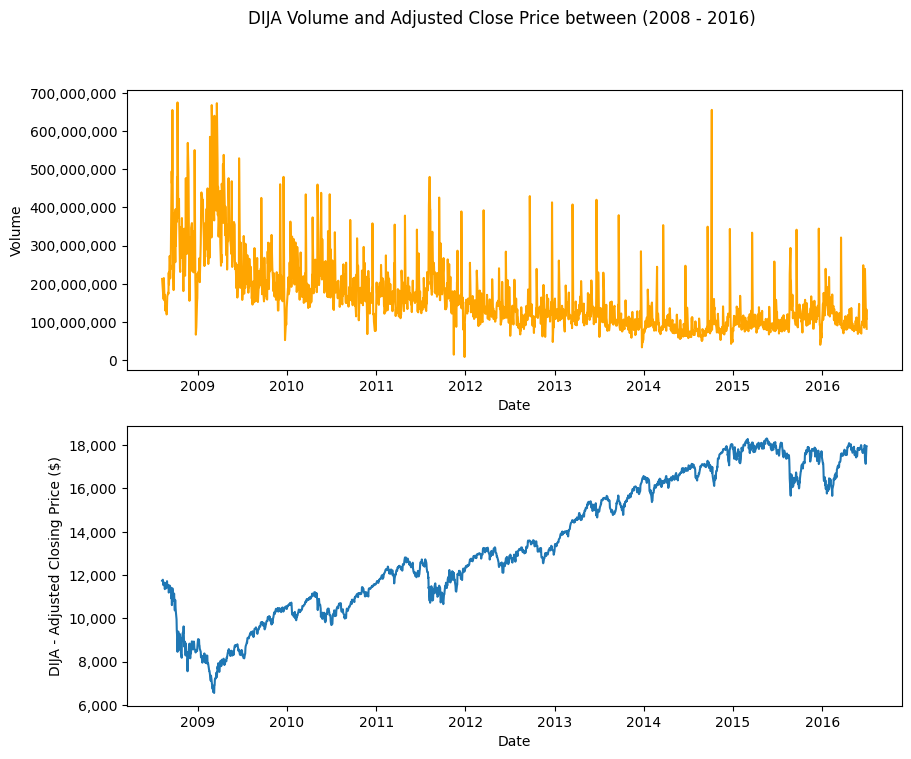

In [11]:
# need to fix the date format
df_DIJA = df_DIJA.assign(Date = pd.to_datetime(df_DIJA["Date"]))

# plot the data
fig, (ax0, ax1) = plt.subplots(2,1)

ax0.yaxis.set_major_formatter('{x:,.0f}')
ax1.yaxis.set_major_formatter('{x:,.0f}')
ax1.set_ylabel("DIJA - Adjusted Closing Price ($)")

sns.lineplot(data=df_DIJA, x = "Date", y = "Volume", ax=ax0, color = "orange")
sns.lineplot(data=df_DIJA, x = "Date", y = "Adj Close", ax=ax1)
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 

plt.suptitle("DIJA Volume and Adjusted Close Price between (2008 - 2016)")
plt.show()